In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

house_df_org = pd.read_csv('house_price.csv')
house_df = house_df_org.copy()
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.isna().sum().sort_values(ascending = False)[:10]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [4]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n 전체 feature 들의 type \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n', isnull_series[isnull_series>0].sort_values(ascending=False))

데이터 세트의 Shape: (1460, 81)

 전체 feature 들의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 컬럼과 그 건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


<AxesSubplot:title={'center':'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

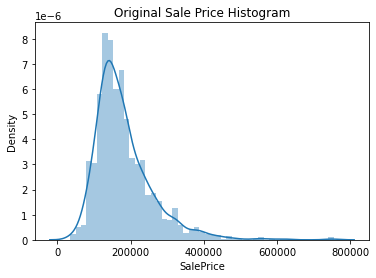

In [5]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

<AxesSubplot:title={'center':'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

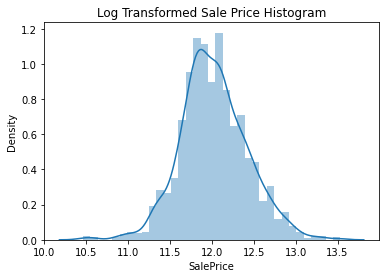

In [6]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [7]:
original_Saleprice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df["SalePrice"])

# 불필요한 컬럼들 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'],
             axis=1, inplace = True)

# 숫자형 null 값은 평균값으로 대체 
house_df.fillna(house_df.mean(), inplace = True)

null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


object 타입의 null 값의 경우에는 그냥 one_hot으로 나타내서 데이터 예측에 참여시켜버림

In [8]:
print('get_dummies() 수행 전 데이터 shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum()>0]

print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 shape: (1460, 75)
get_dummies() 수행 후 데이터 shape: (1460, 271)
## Null 피처의 Type :
 Series([], dtype: object)


선형 회귀 모델의 학습/예측/평가

In [9]:
from sklearn.metrics import mean_squared_error

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE : {1}'.format(model.__class__.__name__, np.round(rmse,3)))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                   test_size = 0.2, random_state=156)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

models=[lr_model, ridge_model, lasso_model]
get_rmses(models)

LinearRegression 로그 변환된 RMSE : 0.132
Ridge 로그 변환된 RMSE : 0.128
Lasso 로그 변환된 RMSE : 0.176


[0.13189576579154386, 0.1275084633405304, 0.17628250556471395]

In [11]:
# 회귀 계수값과 컬럼명 시각화를 위해 상위 10개, 하위10개 회귀계수값과 컬럼명을 가지는 series생성 함수
def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index = X_features.columns)
    coef_high = coef.sort_values(ascending = False).head()
    coef_low = coef.sort_values(ascending = False).tail()
    return coef_high, coef_low

In [12]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24, 10), nrows =1 , ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size = 25)
        axs[i_num].tick_params(axis = 'y', direction = 'in', pad = -120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax = axs[i_num])

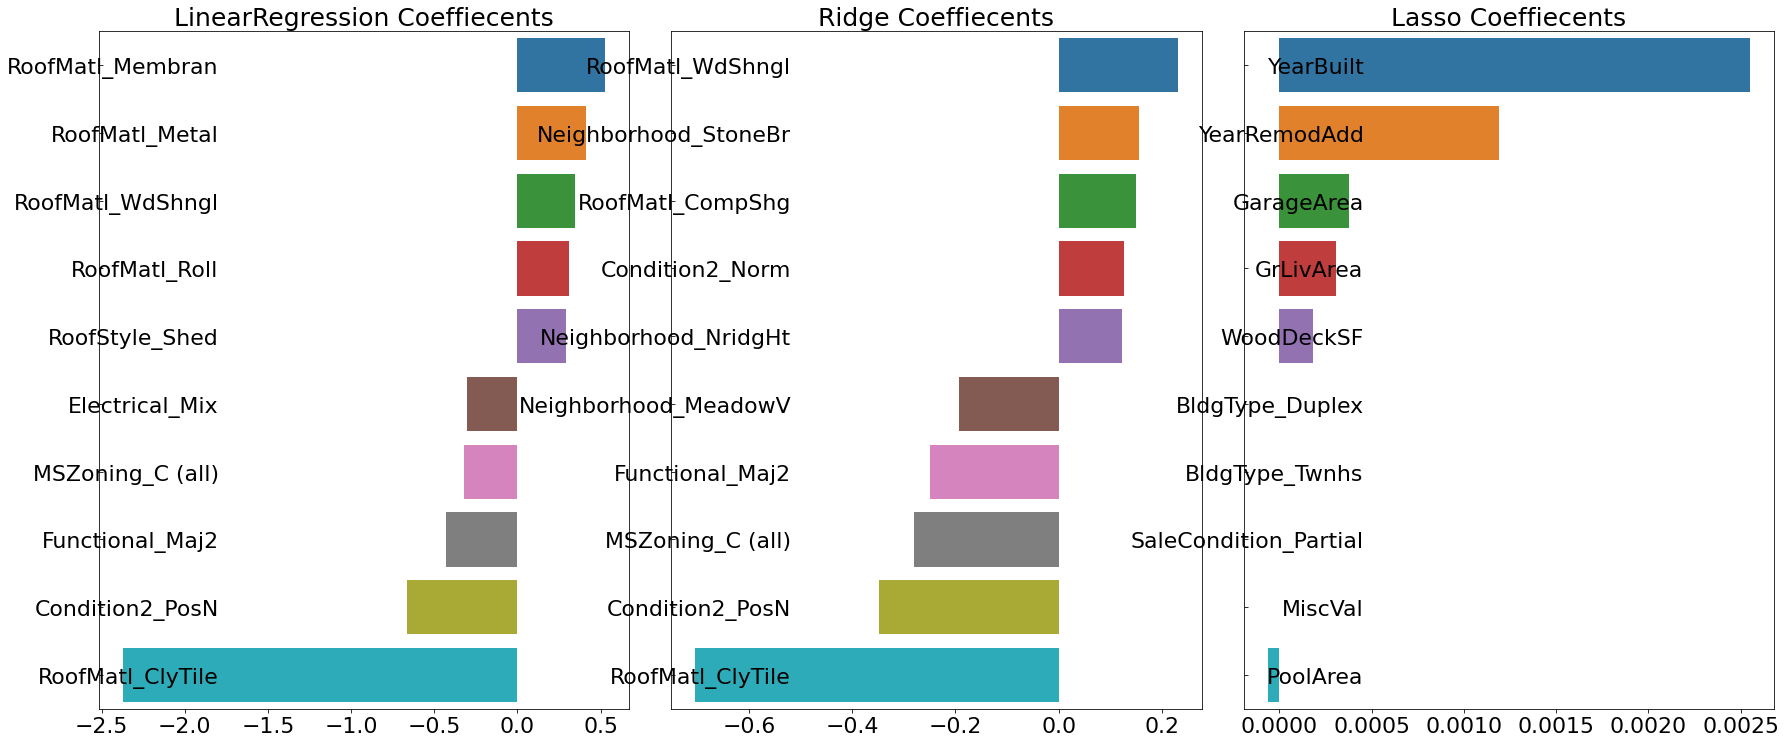

In [13]:
visualize_coefficient(models)

In [14]:
# 5폴드 교차검증으로 모델별로 RMSE와 평균 RMSE 구하기
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = cross_val_score(model, X_features, y_target, 
                                    scoring = 'neg_mean_squared_error',
                                   cv=5)
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트 : {1}'.format(model.__class__.__name__,
                                                np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값 : {1}'.format(model.__class__.__name__,
                                             np.round(rmse_avg, 3)))

get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트 : [-0.018 -0.027 -0.028 -0.012 -0.039]
LinearRegression CV 평균 RMSE 값 : -0.025

Ridge CV RMSE 값 리스트 : [-0.014 -0.024 -0.02  -0.014 -0.036]
Ridge CV 평균 RMSE 값 : -0.021

Lasso CV RMSE 값 리스트 : [-0.026 -0.042 -0.031 -0.033 -0.07 ]
Lasso CV 평균 RMSE 값 : -0.04


In [15]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params,
                             scoring = 'neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값 : {1}, 최적 alpha : {2}'.format(model.__class__.__name__,
                                                                np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = get_best_params(ridge_model, ridge_params)
best_lasso = get_best_params(lasso_model, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1418, 최적 alpha : {'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.142, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE : 0.132
Ridge 로그 변환된 RMSE : 0.124
Lasso 로그 변환된 RMSE : 0.12


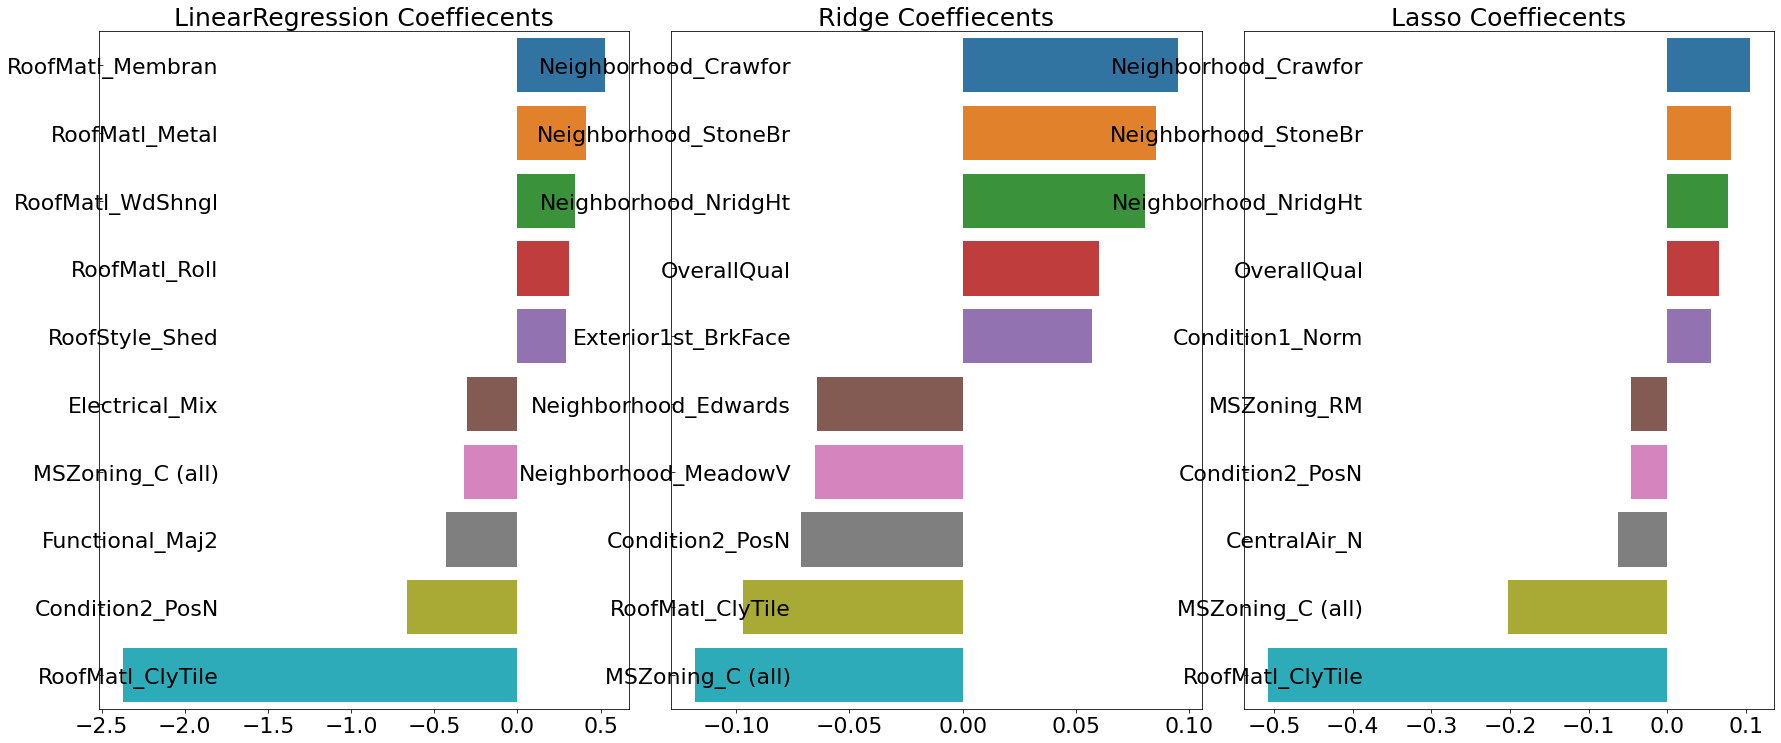

In [16]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

각 모델들의 왜도를 파악하여 치우친 데이터들을 로그 변환을 해준다.

In [17]:
from scipy.stats import skew

feature_index = house_df.dtypes[house_df.dtypes != object].index

skew_features = house_df[feature_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [18]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [19]:
house_df_ohe = pd.get_dummies(house_df)

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                   test_size=0.2,
                                                   random_state = 156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

best_ridge = get_best_params(ridge_model, ridge_params)
best_lassso = get_best_params(lasso_model, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1275, 최적 alpha : {'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.1252, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE : 0.128
Ridge 로그 변환된 RMSE : 0.122
Lasso 로그 변환된 RMSE : 0.119


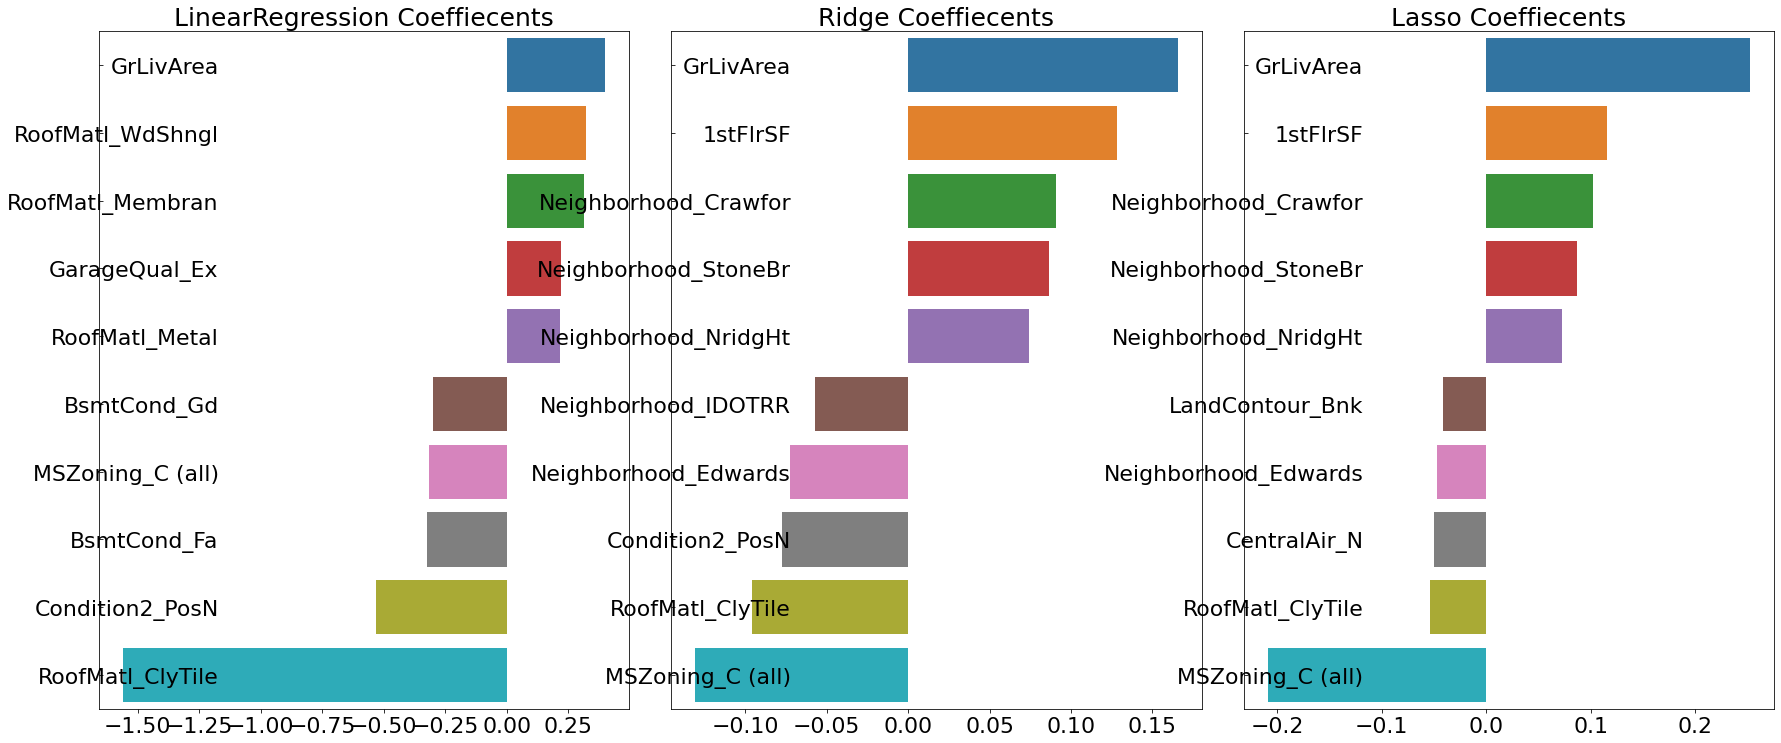

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)

models = [lr_model, ridge_model, lasso_model]
get_rmses(models)
visualize_coefficient(models)

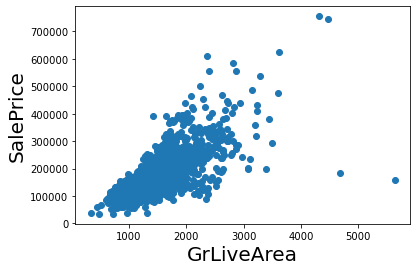

In [21]:
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize = 20)
plt.xlabel('GrLiveArea', fontsize = 20)
plt.show()

In [22]:
condition1 = house_df_ohe['GrLivArea']>np.log1p(4000)
condition2 = house_df_ohe['SalePrice']>np.log1p(700000)
outlier_index = house_df_ohe[condition1 & condition2].index

print('아웃라이어 레코드 index :',outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape', house_df_ohe.shape)
house_df_ohe.drop(outlier_index, axis=0, inplace = True )
print('아웃라이어 삭제 후 house_df_ohe shape', house_df_ohe.shape)

아웃라이어 레코드 index : [ 691 1182]
아웃라이어 삭제 전 house_df_ohe shape (1460, 271)
아웃라이어 삭제 후 house_df_ohe shape (1458, 271)


In [23]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                   test_size = 0.2,
                                                   random_state = 156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

best_ridge = get_best_params(ridge_model, ridge_params)
best_lasso = get_best_params(lasso_model, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1272, 최적 alpha : {'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.1249, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE : 0.119
Ridge 로그 변환된 RMSE : 0.107
Lasso 로그 변환된 RMSE : 0.101


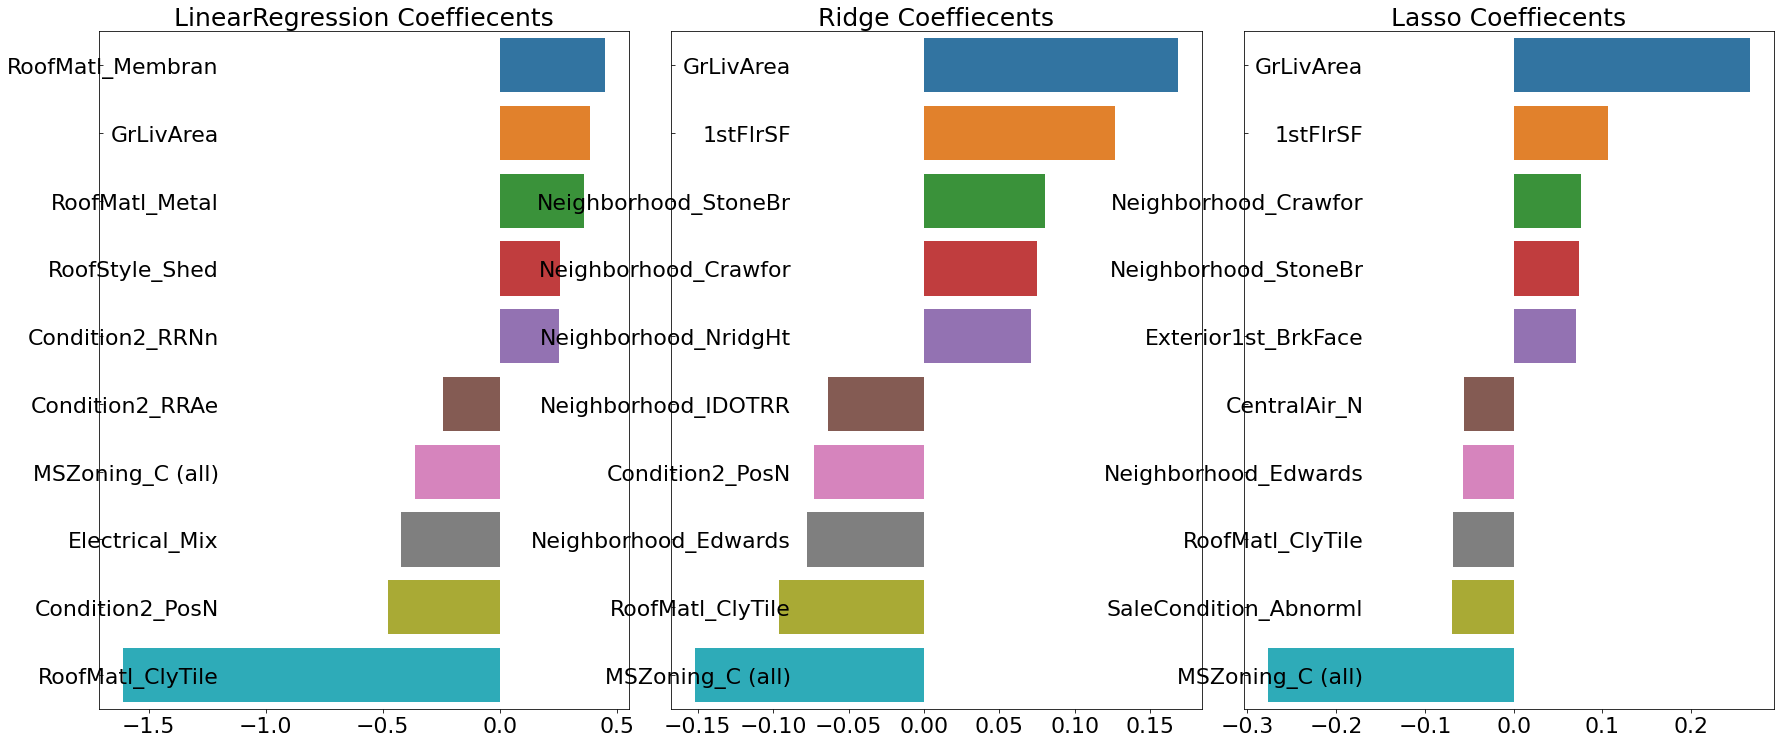

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train, y_train)

models = [lr_model, ridge_model, lasso_model]
get_rmses(models)
visualize_coefficient(models)

회귀 트리 모델로 모델 구현

In [26]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators' : [1000]}
xgb_model = XGBRegressor(learning_rate=0.05, subsample=0.8, colsample_bytree=0.5)
best_xgb = get_best_params(xgb_model, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값 : 0.1222, 최적 alpha : {'n_estimators': 1000}


In [30]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_model = LGBMRegressor(learning_rate=0.05, num_leaves=4, colsample_bytree=0.4,
                          subsample=0.6, reg_lambda = 10 , n_jobs=-1)
best_lgbm = get_best_params(lgbm_model, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값 : 0.1211, 최적 alpha : {'n_estimators': 1000}


트리 회귀 모델의 피처 중요도 시각화

In [38]:
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    # numpy 형태를 시각화를 위해 pandas series 형태로 변환
    ftr_importances = pd.Series(ftr_importances_values, index = X_features.columns)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

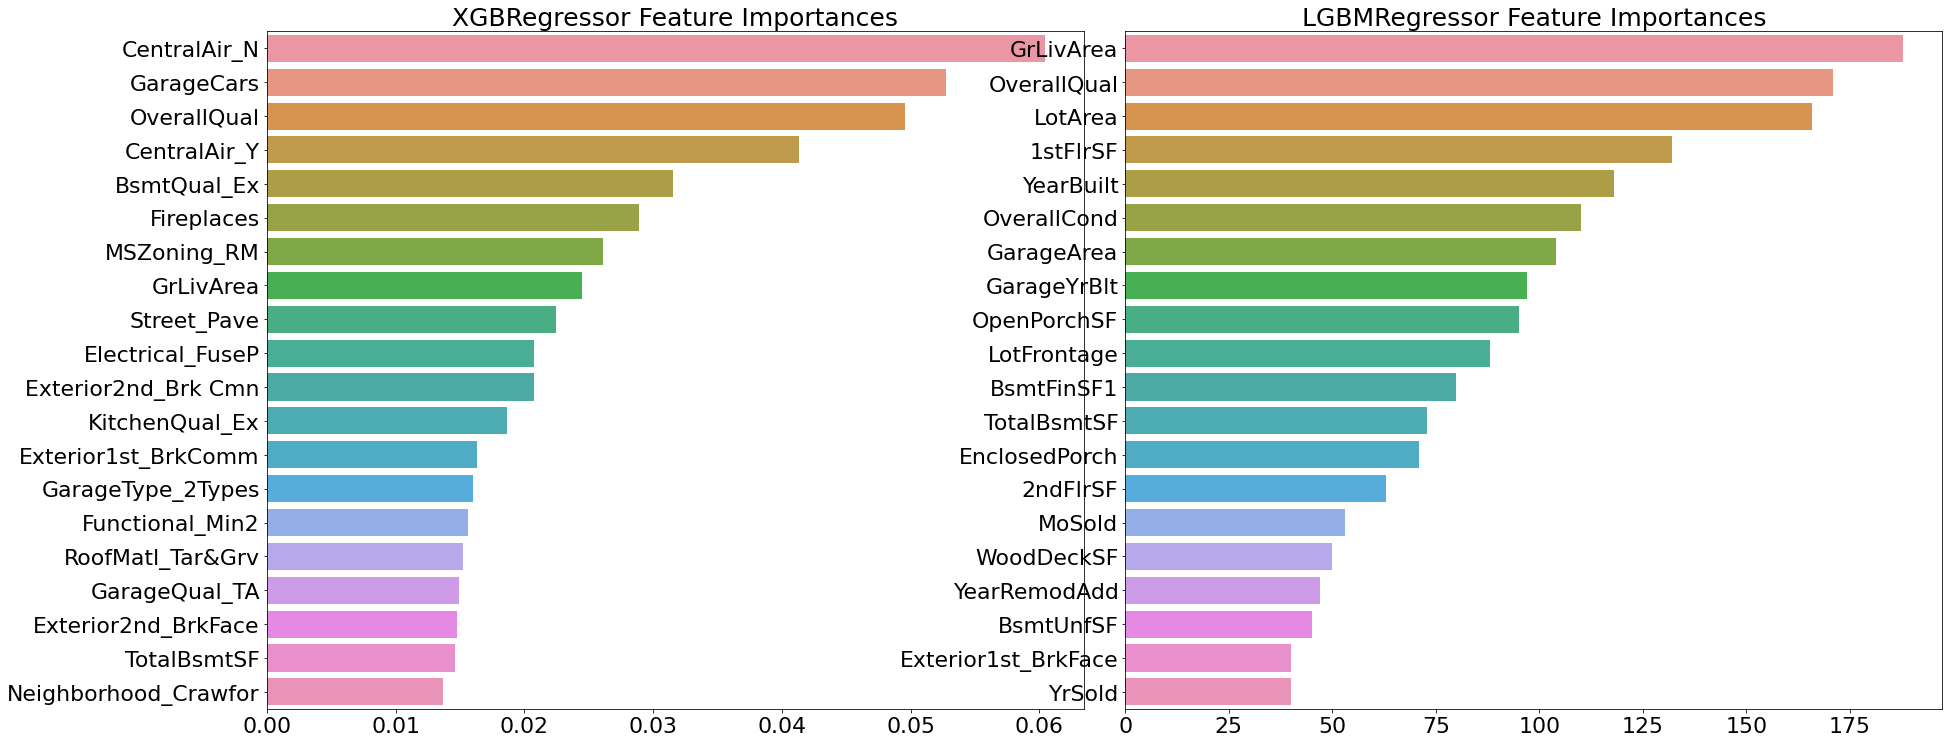

In [39]:
def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 get_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

회귀 모델들의 예측 결과 혼합을 통한 최종 예측

In [42]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_values = preds[key]
        mse = mean_squared_error(y_test, pred_values)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))
        

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4*ridge_pred + 0.6*lasso_pred
preds = {'최종 혼합' : pred,
        'Ridge':ridge_pred,
        'lasso':lasso_pred}

get_rmse_pred(preds)
        

최종 혼합 모델의 RMSE: 0.10212552213491141
Ridge 모델의 RMSE: 0.10822440025153786
lasso 모델의 RMSE: 0.10092444580703604


In [43]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10415057768155696
XGBM 모델의 RMSE: 0.10928528029641778
LGBM 모델의 RMSE: 0.10493899814220245


In [54]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits = n_folds, shuffle = False)
    # 메타 모델이 사용할 학습데이터를 반환을 하기 위해서는 넘파이 배열을 초기화해야함
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
        test_pred[:,folder_counter] = model.predict(X_test_n)
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    return train_fold_pred, test_pred_mean

In [55]:
# get_stacking_base_datasets()는 넘파이 ndrray를 인자로 사용하기 때문에 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
y_train_n = y_train.values
X_test_n = X_test.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_model, X_train_n, y_train_n,
                                                    X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_model, X_train_n, y_train_n,
                                                    X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [58]:
Stack_final_X_train =np.concatenate((ridge_train, lasso_train, xgb_train,
                                    lgbm_train), axis = 1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test,
                                     lgbm_test), axis = 1)
meta_model_lasso  = Lasso(alpha = 0.0005)
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 모델의 최종 rmse 값은 : ', rmse)




스태킹 모델의 최종 rmse 값은 :  0.09911623023875753


# 신용카드 데이터 세트 PCA 변환

In [ ]:
import pandas as pd 
df = pd.read_excel('./')